In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: declination_dependent_noise.py
"""
Created on Tue Jun 26 12:38:35 2018

@author: Neo(liuniu@smail.nju.edu.cn)

Estimate the declination dependent noise (-90 deg ~ -30 deg), using the method of DSM.

"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, deg2rad, sqrt
from scipy.optimize import curve_fit
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# My module
from error_inflation_progs import (error_inflation, wrms_calc, 
                                   sf_nf_calc, pos_offset_wrms_soubinned,
                                  declination_error_calc_DSM)

In [2]:
# Load data
datfile = "../logs/pos_diff_cln.dat"
soulist = np.genfromtxt(datfile, usecols=(0,), dtype=str)
RA, Dec, dRAc, dDec, dRAc_err, dDec_err = np.genfromtxt(
    datfile, usecols=range(1, 7), unpack=True)

In [3]:
# Calculate the declination-dependent noise and scale factor
dec_means, bin_nums, sf_RAs, nf_RAs, sf_Decs, nf_Decs = declination_error_calc_DSM(
    Dec, dRAc, dDec, dRAc_err, dDec_err)

#  bin   Num_sou    sf_ra    nf_ra   sf_dec   sf_dec
[-90,-75)    11    1.547    0.032    0.876    0.022
[-75,-60)    42    1.411    0.054    0.976    0.045
[-60,-45)    37    1.513    0.054    1.124    0.050
[-45,-30)    64    1.465    0.028    1.403    0.035
[-30,-15)    76    1.254    0.022    1.409    0.030
[-15, +0)    63    1.483    0.017    1.487    0.022
[ +0,+15)   125    1.386    0.021    1.255    0.026
[+15,+30)    98    1.467    0.021    1.210    0.022
[+30,+45)    90    1.333    0.017    1.283    0.020
[+45,+60)    54    1.389    0.014    1.517    0.018
[+60,+75)    36    1.264    0.015    1.298    0.015
[+75,+90)    13    1.571    0.015    1.433    0.013


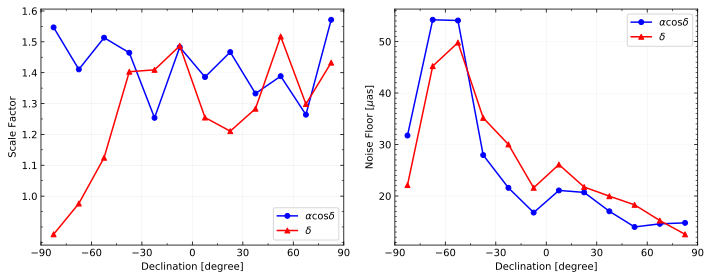

In [4]:
# Plot of declination-dependent noise and scale factor
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2, sharex=True)
# fig, (ax0, ax1) = plt.subplots(figsize=(4, 6), nrows=2, sharex=True)

ax0.plot(dec_means, sf_RAs, "bo-", markersize=5, label="$\\alpha\cos\delta$")
ax0.plot(dec_means, sf_Decs, "r^-", markersize=5, label="$\delta$")
ax1.plot(dec_means, nf_RAs * 1.e3, "bo-", markersize=5, label="$\\alpha\cos\delta$")
ax1.plot(dec_means, nf_Decs * 1.e3, "r^-", markersize=5, label="$\delta$")

# ax0.set_xscale("log")
ax0.set_xlabel("Declination [degree]")
ax0.set_xlim([-90, 90])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_ylabel("Scale Factor")
ax0.set_yticks(np.arange(1., 1.6, 0.1))
# ax0.set_ylim([0.9, 1.5])
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.grid(True)
ax0.legend()

ax1.set_xlabel("Declination [degree]")
ax1.set_ylabel("Noise Floor [$\mu$as]")
# ax1.set_ylim([0, 30])
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.grid(True)
ax1.legend()

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(0.05)
ax0.yaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(1)
ax1.yaxis.set_minor_locator(minorLocator)

minorLocator = MultipleLocator(15)
ax0.xaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)

plt.tight_layout()

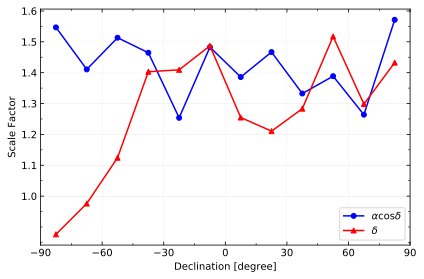

In [5]:
# Plot of declination-dependent scale factor
fig, ax0 = plt.subplots()

ax0.plot(dec_means, sf_RAs, "bo-", markersize=5, label="$\\alpha\cos\delta$")
ax0.plot(dec_means, sf_Decs, "r^-", markersize=5, label="$\delta$")
ax1.plot(dec_means, nf_RAs * 1.e3, "bo-", markersize=5, label="$\\alpha\cos\delta$")
ax1.plot(dec_means, nf_Decs * 1.e3, "r^-", markersize=5, label="$\delta$")

# ax0.set_xscale("log")
ax0.set_xlabel("Declination [degree]")
ax0.set_xlim([-90, 90])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_ylabel("Scale Factor")
ax0.set_yticks(np.arange(1., 1.6, 0.1))
# ax0.set_ylim([0.9, 1.5])
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.grid(True)
ax0.legend()


from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(0.05)
ax0.yaxis.set_minor_locator(minorLocator)

minorLocator = MultipleLocator(15)
ax0.xaxis.set_minor_locator(minorLocator)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.1)
# plt.savefig("../plots/dec_nf_sf.eps")

# plt.savefig("/Users/Neo/Desktop/decl_band_sf.png")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


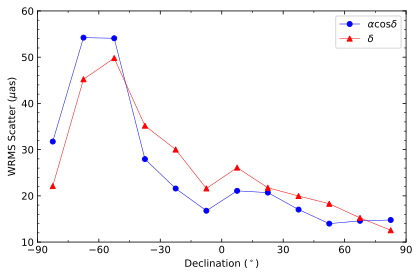

In [6]:
# Plot of declination-dependent noise and scale factor
fig, ax1 = plt.subplots()

ax1.plot(dec_means, nf_RAs * 1.e3, "bo-", markersize=5, label="$\\alpha\cos\delta$", lw=0.5)
ax1.plot(dec_means, nf_Decs * 1.e3, "r^-", markersize=5, label="$\delta$", lw=0.5)

ax1.set_xlabel("Declination (${}^\circ$)")
ax1.set_xlim([-90, 90])
ax1.set_xticks(np.arange(-90, 91, 30))
ax1.set_ylabel("WRMS Scatter ($\mu$as)")
ax1.set_ylim([10, 60])
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
# ax1.grid(True)
ax1.legend()

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(2)
ax1.yaxis.set_minor_locator(minorLocator)

minorLocator = MultipleLocator(15)
ax1.xaxis.set_minor_locator(minorLocator)

plt.tight_layout()
plt.savefig("../plots/dec_nf.eps")

Text(0, 0.5, 'Number of sources')

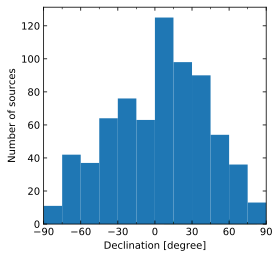

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
bins_array = np.arange(-90, 90, 15) + 7.5
ax.hist(bin_nums, bins_array, facecolor="g", alpha=0.75)
ax.bar(bins_array, bin_nums, width=15)

ax.set_xlim([-90, 90])
ax.set_xticks(np.arange(-90, 91, 30))

from matplotlib.ticker import MultipleLocator
minorLocator = MultipleLocator(15)
ax.xaxis.set_minor_locator(minorLocator)

ax.set_xlabel("Declination [degree]")
ax.set_ylabel("Number of sources")

# plt.savefig("/Users/Neo/Desktop/dec_band_hist.png")

In [8]:
print("The median declination is ", np.median(Dec))
print(" Average noise floor is ", np.mean(nf_RAs * 1.e3), np.mean(nf_Decs * 1.e3))

The median declination is  7.6909834676
 Average noise floor is  25.712270164103828 26.484918225941783


In [9]:
mask = (Dec >-30)
print(Dec[mask].size, Dec[mask].size/Dec.size)

555 0.7827926657263752


In [10]:
mask1 = (dec_means >= 0)
print("Median ", np.median(nf_RAs[mask1]), np.median(nf_Decs[mask1]))

mask2 = (dec_means < 0)
print("Median ", np.median(nf_RAs[mask2]), np.median(nf_Decs[mask2]))

Median  0.01590386515974048 0.019122378911152548
Median  0.02985020409319001 0.03259598249764042
